##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

1)

In [1]:
from sklearn import linear_model, metrics, model_selection
import sklearn
import numpy as np
import patsy
import pandas as pd
import matplotlib.pyplot as plt 

2)

In [2]:
df = pd.read_csv('SCORES.csv')
#df.head()
#df.describe()

3)

Text(0, 0.5, 'Oceny')

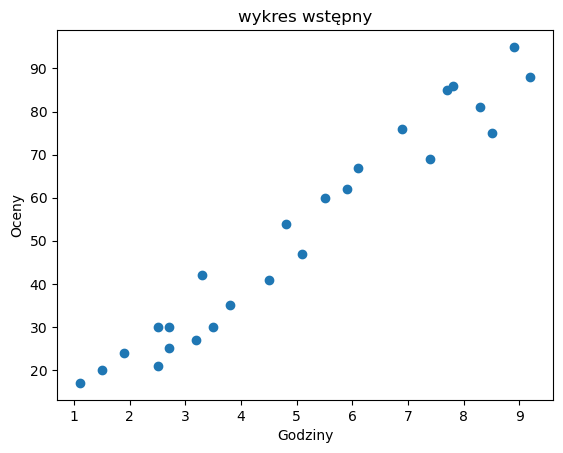

In [3]:
plt.scatter(df.Hours, df.Scores)
plt.title("wykres wstępny")
plt.xlabel("Godziny")
plt.ylabel("Oceny")

4)

In [4]:
 X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(np.array(df.Hours).reshape(-1, 1), np.array(df.Scores).reshape(-1, 1), test_size=0.30, random_state=42)

5)

In [5]:
reg = sklearn.linear_model.LinearRegression().fit(X_train, y_train)

6)

In [6]:
print("coef_ =",reg.coef_)
print("intercept_ =",reg.intercept_)

coef_ = [[9.71054094]]
intercept_ = [2.79419668]


Model przypomina funkcję afiniczną postaci y=ax+b gdzie a = coef_ a b = intercept_ 

7)

In [7]:
y_pred = reg.predict(X_test)
print("Średni błąd względny pomiędzy predykcją a rzeczywistą wartością",np.mean(y_pred-y_test))


Średni błąd względny pomiędzy predykcją a rzeczywistą wartością -0.051787969089349684


8)

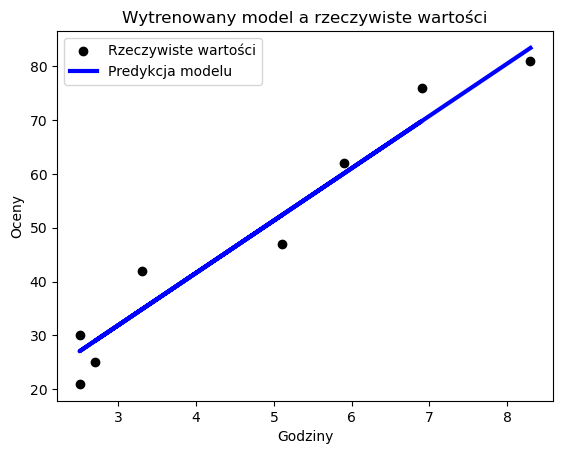

In [8]:

plt.scatter(X_test, y_test, color="black", label='Rzeczywiste wartości')
plt.plot(X_test, y_pred, color="blue", linewidth=3, label='Predykcja modelu')
plt.title("Wytrenowany model a rzeczywiste wartości")
plt.xlabel("Godziny")
plt.ylabel("Oceny")
plt.legend(loc = 'upper left')


9)

In [9]:
print("Średni błąd bezwzględny:",np.mean(np.abs(y_pred-y_test)))
print("Błąd średniokwadratowy:",np.mean((y_pred-y_test)**2))
print("Pierwiastek błędu średniokwadratowego:",np.sqrt(np.mean((y_pred-y_test)**2)))

Średni błąd bezwzględny: 4.499999999999998
Błąd średniokwadratowy: 23.61945761415174
Pierwiastek błędu średniokwadratowego: 4.859985351228103


### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [10]:
df = pd.read_csv('PETROL.csv')
df.head()


,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [11]:
df.describe()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [12]:
pom = np.array(df[["Podatek_paliwowy","Sredni_przychod","Utwardzone_autostrady","Procent_ludnosci_z_prawem_jazdy"]])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(pom, np.array(df.Zuzycie_paliwa).reshape(-1, 1), test_size=0.30, random_state=42)

In [13]:
reg = sklearn.linear_model.LinearRegression().fit(X_train, y_train)

In [14]:
print("coef_ =",reg.coef_)
print("intercept_ =",reg.intercept_)

coef_ = [[-3.99336011e+01 -4.53815410e-02 -4.95597538e-03  1.03711642e+03]]
intercept_ = [513.1398382]


In [15]:
y_pred = reg.predict(X_test)
print("Średni błąd bezwzględny:",np.mean(np.abs(y_pred-y_test)))
print("Błąd średniokwadratowy:",np.mean((y_pred-y_test)**2))
print("Pierwiastek błędu średniokwadratowego:",np.sqrt(np.mean((y_pred-y_test)**2)))

Średni błąd bezwzględny: 63.026524465574624
Błąd średniokwadratowy: 8076.669020354719
Pierwiastek błędu średniokwadratowego: 89.87028997591317


Wyniki nie wyglądają na dobre. W modelu liniowym natura procesu powinna być taka, aby każda ze zmiennych była mniej więcej niezależna wobec siebie w sposób jaki przyczyniają się do obliczenia przewidywanej wartości. Procesy innej natury mogą być źle odzwierciedlone przez ten model. Podany w zadaniu przykład jest przypadkiem takiej sytuacji - region z większym przychodem mógłby spodziewać się większego zużycia paliwa, ale jeżeli mniejsza część populacji posiada w ogóle prawo jazdy to wzrost przychodu niekoniecznie zwiąże się ze wzrostem zużycia paliwa...

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

In [16]:
#reg = sklearn.linear_model.LogisticRegression().fit(X_train, y_train.ravel())

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

1) biblioteki takie jak z zad 1, z dodatkiem sklearn.metrics

In [17]:
from sklearn import linear_model, metrics, model_selection
import sklearn
import numpy as np
import patsy
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report

2)

In [18]:
df = pd.read_csv('HEART.csv')
df.head(3)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0


In [19]:
#df.describe()
#np.shape(df)

3)

In [20]:
df = df.replace("?",np.nan)

In [21]:
df = df.drop(columns=['slope', 'ca', 'thal'])

df.head(4)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,NaN,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0


In [22]:
df = df.dropna()
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [23]:
df = pd.get_dummies(df,columns = ["cp","restecg"])
df.head(4)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2
0,28,1,130,132,0,185,0,0.0,0,0,1,0,0,0,0,1
1,29,1,120,243,0,160,0,0.0,0,0,1,0,0,1,0,0
3,30,0,170,237,0,170,0,0.0,0,1,0,0,0,0,1,0
4,31,0,100,219,0,150,0,0.0,0,0,1,0,0,0,1,0


In [24]:
pom = np.array(df[["age","sex","trestbps","chol","fbs","thalach","exang","oldpeak","cp_1","cp_2","cp_3","cp_4","restecg_0","restecg_1","restecg_2"]])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(pom, np.array(df["num       "]).reshape(-1, 1), test_size=0.20, random_state=42)

In [25]:
reg = sklearn.linear_model.LogisticRegression().fit(X_train, y_train.ravel())

C:\Users\To_Ja\anaconda3_new\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(co do warningu, myślę, że ustalanie dużej ilości iteracji spowoduje dłuższy czas działania notebooka. Nie byłloby to przyjemne podczas oceniania jeżeli notebook jest testowany od zera, zostawię więc domyślny limit który szybko jest osiągany)

In [26]:
y_pred = reg.predict(X_test)


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.74      0.85      0.79        20

    accuracy                           0.83        53
   macro avg       0.82      0.83      0.82        53
weighted avg       0.84      0.83      0.83        53



Model posiadał dużą ilość wpisów z wartością num=0, może była to przyczyna lepszej wartości kryterium precision dla num=0. kryterium recall jest podobne dla obydwu klasyfikacji num=0,num=1. Wyniki pokazują, że podany model regresji logistycznej od pakietu sklearn poradził sobie na tyle dobrze, że korzystanie z niego do tego typu zestawu danych jest możliwością wartą zastanowienia.